# Add libraries

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [11]:
customer = pd.read_csv('D:/customer_analysis/raw_data/marketing_campaign.csv', sep="\t")

# Data Exploration

## Basic information

### Head and Tail

In [32]:
customer.head().style.background_gradient(cmap='PuBu')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Children
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04 00:00:00,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08 00:00:00,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21 00:00:00,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10 00:00:00,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19 00:00:00,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [13]:
customer.tail().style.background_gradient(cmap='PuBu')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.000000,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.000000,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.000000,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.000000,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.000000,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


### Describe table

In [33]:
customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Children
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803


## Get more information about columns

### Information about year of birth **(Year_Birth)**

In [16]:
customer.Year_Birth.min()

1893

In [17]:
customer.Year_Birth.max()

1996

### Information about **Education**

In [18]:
customer.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

### Information about marital status **(Marital_Status)**

In [19]:
customer.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### Information about number of kids at home **(Kidhome)**

In [20]:
customer.Kidhome.unique()

array([0, 1, 2], dtype=int64)

### Information about number of teenagers at home **(Teenhome)**

In [21]:
customer.Teenhome.unique()

array([0, 1, 2], dtype=int64)

### Calculating the total number of children **(Total_Children)**

In [22]:
customer['Total_Children'] = customer['Kidhome'] + customer['Teenhome']

In [23]:
customer['Total_Children'].unique()

array([0, 2, 1, 3], dtype=int64)

### Information about customer enrollment **(Dt_Customer)**

In [24]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'], format='%d-%m-%Y')

In [25]:
customer['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [26]:
customer['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

### Information about last purchase **(Recency)**

In [27]:
customer['Recency'].min()

0

In [28]:
customer['Recency'].max()

99

In [29]:
customer['Recency'].mean()

49.109375

In [30]:
customer['Recency'].median()

49.0

# Data analyzing

In [35]:
customer.head().style.background_gradient(cmap='gray')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Children
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04 00:00:00,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08 00:00:00,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21 00:00:00,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10 00:00:00,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19 00:00:00,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [36]:
# Because of the hour part in Dt_Customer, the table has deformation. So I want to remove this part
customer['Dt_Customer'] = customer['Dt_Customer'].dt.date

In [39]:
customer.head().style.background_gradient(cmap='gray')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Children,NumPurchases
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,25
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,6
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,21
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,8
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,19


## Calculating total number of purchase

In [40]:
# Create new column (NumPurchases)
customer['NumPurchases'] = customer['NumDealsPurchases'] + customer['NumWebPurchases'] + customer['NumCatalogPurchases'] + customer['NumStorePurchases']

## Relationship between education and income

In [45]:
# In the first step, it is very interesting for me to learn about the relationship between education and income
education_income_summary = customer.groupby('Education')['Income'].describe()
print(education_income_summary)

             count          mean           std     min       25%      50%  \
Education                                                                   
2n Cycle     200.0  47633.190000  22119.081838  7500.0  27526.50  46805.0   
Basic         54.0  20306.259259   6235.066773  7500.0  15405.25  20744.0   
Graduation  1116.0  52720.373656  28177.192681  1730.0  34834.50  52028.5   
Master       365.0  52917.534247  20157.788029  6560.0  37760.00  50943.0   
PhD          481.0  56145.313929  20612.979997  4023.0  40451.00  55212.0   

                 75%       max  
Education                       
2n Cycle    65393.25   96547.0  
Basic       24882.00   34445.0  
Graduation  69930.50  666666.0  
Master      66726.00  157733.0  
PhD         69098.00  162397.0  


In [61]:
education_income_mean = customer.groupby('Education')['Income'].mean()
print(education_income_mean)

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64


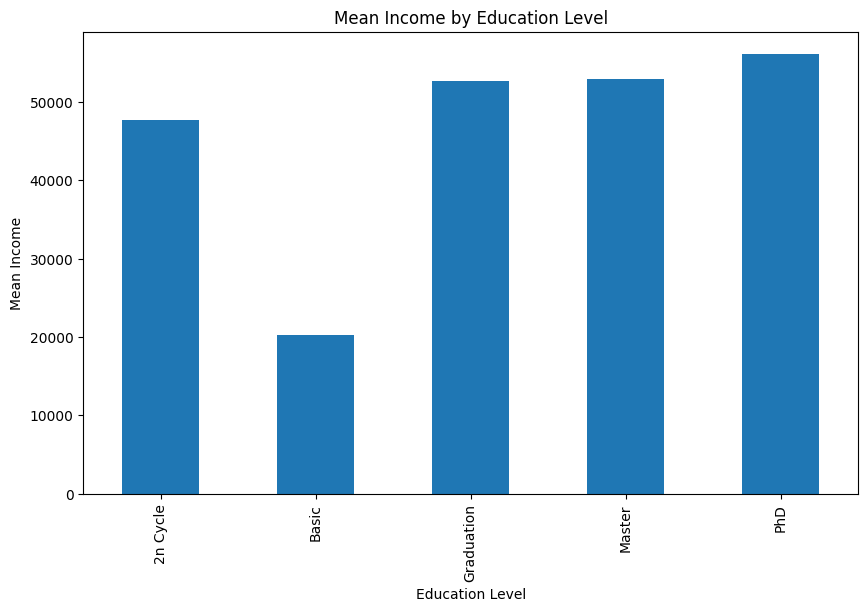

In [69]:
education_income_mean.plot(kind='bar', figsize=(10,6))
plt.title('Mean Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Income')
plt.show()


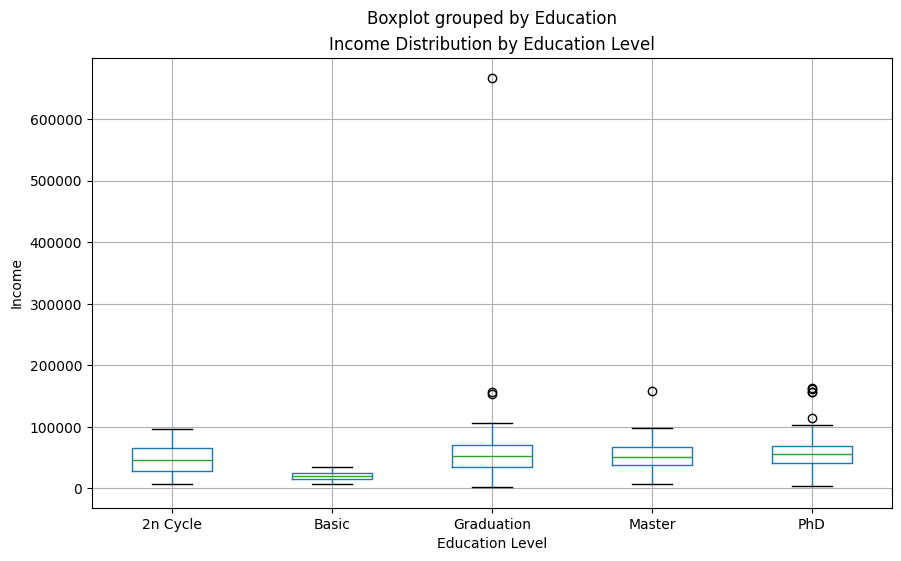

In [52]:
customer.boxplot(column='Income', by='Education', figsize=(10, 6))
plt.title('Income Distribution by Education Level')
plt.ylabel('Income')
plt.xlabel('Education Level')
plt.show()

In [ ]:
# So, there is a positive relationship between education and income. The highest mean income belongs to the PhD level of education, while the lowest belongs to the basic level of education.

## Relationship between income **(Income)** and total number of purchase **(NumPurchases)**

In [70]:
customer['NumPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [81]:
income_purchase_mean = customer.groupby('NumPurchases')['Income'].mean()

<Axes: xlabel='NumPurchases'>

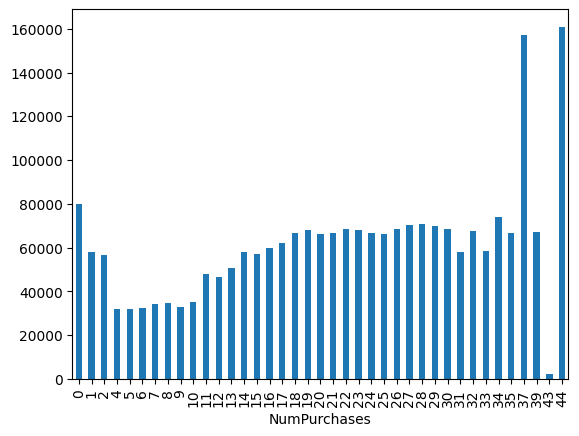

In [84]:
income_purchase_mean.plot(kind='bar')

<Axes: title={'center': 'Income'}, xlabel='NumPurchases'>

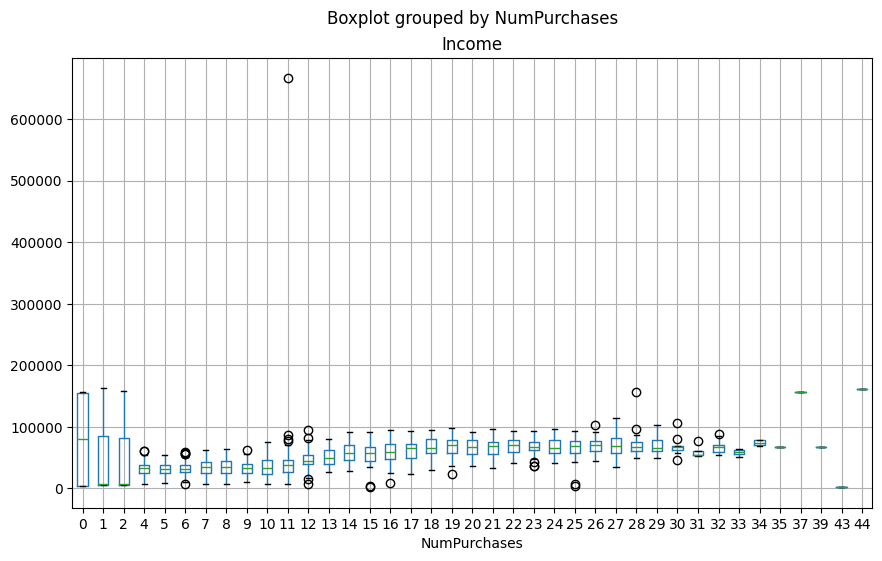

In [78]:
customer.boxplot(column='Income', by='NumPurchases', figsize=(10, 6))

<Axes: xlabel='NumPurchases', ylabel='Income'>

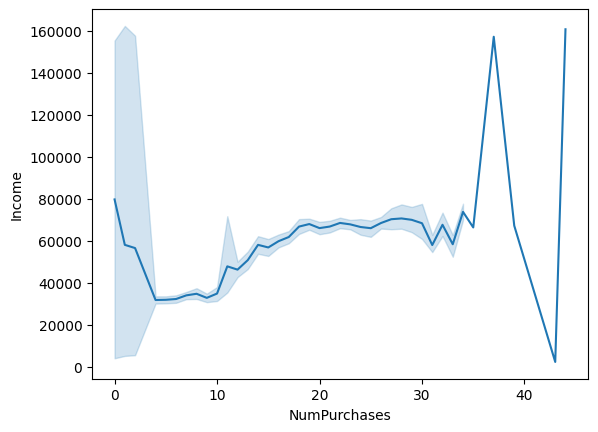

In [75]:
sns.lineplot(data=customer, x='NumPurchases', y='Income')